# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


# Goals
* X Education needs a model to indentify the leads that are most likely to convert into paying customers by assigning a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
* The CEO has ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

In [4]:
# Data Dictionary
data_dict = pd.read_excel('Leads Data Dictionary.xlsx',header=1,usecols=[1,2],)

# Countries Socio-Economic and Health Related data
df_leads = pd.read_csv('Leads.csv',encoding="utf-8")

In [5]:
data_dict

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [6]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Use describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Function to display null percentages in descending order
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'Null Count',1:'Null Percentage'}).\
sort_values(by='Null Percentage',ascending=False)
    return df

In [9]:
null_summary(df_leads)

,Null Count,Null Percentage
Lead Quality,4767.0,51.59
Asymmetrique Activity Index,4218.0,45.65
Asymmetrique Profile Score,4218.0,45.65
Asymmetrique Activity Score,4218.0,45.65
Asymmetrique Profile Index,4218.0,45.65
Tags,3353.0,36.29
Lead Profile,2709.0,29.32
What matters most to you in choosing a course,2709.0,29.32
What is your current occupation,2690.0,29.11
Country,2461.0,26.63


In [10]:
# Check missing values
null_summary(df_leads)

,Null Count,Null Percentage
Lead Quality,4767.0,51.59
Asymmetrique Activity Index,4218.0,45.65
Asymmetrique Profile Score,4218.0,45.65
Asymmetrique Activity Score,4218.0,45.65
Asymmetrique Profile Index,4218.0,45.65
Tags,3353.0,36.29
Lead Profile,2709.0,29.32
What matters most to you in choosing a course,2709.0,29.32
What is your current occupation,2690.0,29.11
Country,2461.0,26.63


In [11]:
sum(df_leads.duplicated())

0

In [12]:
# Check percentage of leads converted and not-converted 
round(df_leads.Converted.value_counts()/len(df_leads.index),4)*100

0    61.46
1    38.54
Name: Converted, dtype: float64

In [13]:
#replace "Select" by 'NaN'
df_leads.replace("Select",np.nan,inplace=True)

In [14]:
null_summary(df_leads)

,Null Count,Null Percentage
How did you hear about X Education,7250.0,78.46
Lead Profile,6855.0,74.19
Lead Quality,4767.0,51.59
Asymmetrique Profile Score,4218.0,45.65
Asymmetrique Activity Score,4218.0,45.65
Asymmetrique Activity Index,4218.0,45.65
Asymmetrique Profile Index,4218.0,45.65
City,3669.0,39.71
Specialization,3380.0,36.58
Tags,3353.0,36.29


In [15]:
drop_columns=list(null_summary(df_leads).loc[null_summary(df_leads)['Null Percentage'] > 30 , :].index)
drop_columns

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Specialization',
 'Tags']

In [16]:
# Drop columns with more than 30% . These coulmns can be deleted.
# Also, drop columns 'Prospect ID' and 'Lead Number' 
# as they are columns with unique ids representing each record and not significant for the analysis.
drop_columns.extend(['Prospect ID','Lead Number'])

In [17]:
drop_columns

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Specialization',
 'Tags',
 'Prospect ID',
 'Lead Number']

In [18]:
df_leads.drop(columns=drop_columns,inplace=True)

In [19]:
df_leads.shape

(9240, 25)

In [20]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [21]:
df_leads.columns = df_leads.columns.str.lower().str.strip().str.replace(' ','_')

In [22]:
df_leads.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'converted', 'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit', 'last_activity', 'country', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity'], dtype='object')

In [23]:
# Create variables containing column names of numeric variables and categorical variables
num_vars = list(df_leads.select_dtypes(include=[np.number]).columns)
cat_vars = list(df_leads.select_dtypes(exclude=[np.number]).columns)

In [24]:
# Convert all Categorical variable categories into lower case
df_leads = df_leads.applymap (lambda x: x.lower().replace(' ','_') if  type(x) == str else x)

In [25]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
lead_origin                                      9240 non-null object
lead_source                                      9204 non-null object
do_not_email                                     9240 non-null object
do_not_call                                      9240 non-null object
converted                                        9240 non-null int64
totalvisits                                      9103 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9103 non-null float64
last_activity                                    9137 non-null object
country                                          6779 non-null object
what_is_your_current_occupation                  6550 non-null object
what_matters_most_to_you_in_choosing_a_course    6531 non-null object
search                                           9240

In [26]:
df_leads.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,update_me_on_supply_chain_content,get_updates_on_dm_content,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,student,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


In [27]:
null_summary(data=df_leads)

,Null Count,Null Percentage
what_matters_most_to_you_in_choosing_a_course,2709.0,29.32
what_is_your_current_occupation,2690.0,29.11
country,2461.0,26.63
totalvisits,137.0,1.48
page_views_per_visit,137.0,1.48
last_activity,103.0,1.11
lead_source,36.0,0.39
lead_origin,0.0,0.00
newspaper,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00


In [28]:
def custom_value_counts(data_series):
    return pd.DataFrame(data_series.value_counts(dropna=False))

In [29]:
# Function to replace 'null' values and other strings present in a column
def custom_replace(dataSeries,rep,by):
    if rep == 'null':
        dataSeries.fillna(by,inplace=True)
    else:
        dataSeries.replace(rep,by,inplace=True)

In [30]:
custom_value_counts(df_leads.what_matters_most_to_you_in_choosing_a_course)

,what_matters_most_to_you_in_choosing_a_course
better_career_prospects,6528
NaN,2709
flexibility_&_convenience,2
other,1


In [31]:
# Replace null by other and also flexibility_&_convenience' by 'other'
custom_replace(dataSeries=df_leads.what_matters_most_to_you_in_choosing_a_course,rep='null',by='other')
custom_replace(dataSeries=df_leads.what_matters_most_to_you_in_choosing_a_course,rep='flexibility_&_convenience',by='other')

In [32]:
custom_value_counts(df_leads.what_matters_most_to_you_in_choosing_a_course)

,what_matters_most_to_you_in_choosing_a_course
better_career_prospects,6528
other,2712


In [33]:
null_summary(data=df_leads)

,Null Count,Null Percentage
what_is_your_current_occupation,2690.0,29.11
country,2461.0,26.63
totalvisits,137.0,1.48
page_views_per_visit,137.0,1.48
last_activity,103.0,1.11
lead_source,36.0,0.39
lead_origin,0.0,0.00
newspaper,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00


In [34]:
custom_value_counts(df_leads.what_is_your_current_occupation)

,what_is_your_current_occupation
unemployed,5600
NaN,2690
working_professional,706
student,210
other,16
housewife,10
businessman,8


In [35]:
# Replace 'NaN' , 'housewife' and 'businessman' by 'other'
custom_replace(dataSeries=df_leads.what_is_your_current_occupation,rep='null',by='other')
custom_replace(dataSeries=df_leads.what_is_your_current_occupation,rep='housewife',by='other')
custom_replace(dataSeries=df_leads.what_is_your_current_occupation,rep='businessman',by='other')

In [36]:
custom_value_counts(df_leads.what_is_your_current_occupation)

,what_is_your_current_occupation
unemployed,5600
other,2724
working_professional,706
student,210


In [37]:
null_summary(data=df_leads)

,Null Count,Null Percentage
country,2461.0,26.63
totalvisits,137.0,1.48
page_views_per_visit,137.0,1.48
last_activity,103.0,1.11
lead_source,36.0,0.39
lead_origin,0.0,0.00
x_education_forums,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00
get_updates_on_dm_content,0.0,0.00


In [38]:
custom_value_counts(df_leads.country)

,country
india,6492
NaN,2461
united_states,69
united_arab_emirates,53
singapore,24
saudi_arabia,21
united_kingdom,15
australia,13
qatar,10
hong_kong,7


In [39]:
# Replace 'NaN' by 'unknown'
# Merge countries having less than 10 records/country to 'other' category
custom_replace(df_leads.country,rep='null',by='unknown')

for k,v in dict(df_leads.country.value_counts()).items():
    if v < 10:
        df_leads.country.replace(k,'other',inplace=True)

In [40]:
custom_value_counts(df_leads.country)

,country
india,6492
unknown,2466
other,77
united_states,69
united_arab_emirates,53
singapore,24
saudi_arabia,21
united_kingdom,15
australia,13
qatar,10


In [41]:
null_summary(data=df_leads)

,Null Count,Null Percentage
totalvisits,137.0,1.48
page_views_per_visit,137.0,1.48
last_activity,103.0,1.11
lead_source,36.0,0.39
lead_origin,0.0,0.00
x_education_forums,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00
get_updates_on_dm_content,0.0,0.00
update_me_on_supply_chain_content,0.0,0.00


In [42]:
custom_value_counts(df_leads.totalvisits)

,totalvisits
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


In [43]:
df_leads.totalvisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: totalvisits, dtype: float64

In [44]:
df_leads.totalvisits.median()

3.0

In [45]:
# Replace 'null' by the median value
df_leads.totalvisits.fillna(df_leads.totalvisits.median(),inplace=True)

In [46]:
df_leads.totalvisits.describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: totalvisits, dtype: float64

In [47]:
custom_value_counts(df_leads.totalvisits)

,totalvisits
0.0,2189
2.0,1680
3.0,1443
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


In [48]:
null_summary(data=df_leads)

,Null Count,Null Percentage
page_views_per_visit,137.0,1.48
last_activity,103.0,1.11
lead_source,36.0,0.39
lead_origin,0.0,0.00
newspaper_article,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00
get_updates_on_dm_content,0.0,0.00
update_me_on_supply_chain_content,0.0,0.00
receive_more_updates_about_our_courses,0.0,0.00


In [49]:
custom_value_counts(df_leads.page_views_per_visit)

,page_views_per_visit
0.00,2189
2.00,1795
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
NaN,137


In [50]:
df_leads.page_views_per_visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [51]:
df_leads.page_views_per_visit.median()

2.0

In [52]:
# Replace 'null' by the median value
custom_replace(df_leads.page_views_per_visit,rep='null',by=df_leads.page_views_per_visit.median())

In [53]:
df_leads.page_views_per_visit.describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [54]:
custom_value_counts(df_leads.page_views_per_visit)

,page_views_per_visit
0.00,2189
2.00,1932
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
7.00,133


In [55]:
null_summary(data=df_leads)

,Null Count,Null Percentage
last_activity,103.0,1.11
lead_source,36.0,0.39
lead_origin,0.0,0.00
newspaper_article,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00
get_updates_on_dm_content,0.0,0.00
update_me_on_supply_chain_content,0.0,0.00
receive_more_updates_about_our_courses,0.0,0.00
through_recommendations,0.0,0.00


In [56]:
custom_value_counts(df_leads.last_activity)

,last_activity
email_opened,3437
sms_sent,2745
olark_chat_conversation,973
page_visited_on_website,640
converted_to_lead,428
email_bounced,326
email_link_clicked,267
form_submitted_on_website,116
NaN,103
unreachable,93


In [57]:
df_leads[df_leads.last_activity.isna()][['last_activity','last_notable_activity','converted']]

,last_activity,last_notable_activity,converted
77,NaN,modified,1
79,NaN,modified,1
81,NaN,modified,1
88,NaN,modified,1
120,NaN,modified,1
133,NaN,modified,1
134,NaN,modified,1
177,NaN,modified,1
179,NaN,modified,1
180,NaN,modified,1


In [58]:
df_leads.last_notable_activity.value_counts(dropna=False)

modified                        3407
email_opened                    2827
sms_sent                        2172
page_visited_on_website          318
olark_chat_conversation          183
email_link_clicked               173
email_bounced                     60
unsubscribed                      47
unreachable                       32
had_a_phone_conversation          14
email_marked_spam                  2
view_in_browser_link_clicked       1
resubscribed_to_emails             1
form_submitted_on_website          1
approached_upfront                 1
email_received                     1
Name: last_notable_activity, dtype: int64

In [59]:
set(df_leads.last_activity) - set(df_leads.last_notable_activity)

{'converted_to_lead', nan, 'visited_booth_in_tradeshow'}

In [60]:
set(df_leads.last_notable_activity) - set(df_leads.last_activity)

{'modified'}

In [61]:
df_leads[['last_activity','last_notable_activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,last_activity,last_notable_activity
last_activity,1.000000,0.737304
last_notable_activity,0.737304,1.000000


In [62]:
df_leads.shape

(9240, 25)

In [63]:
# Since high correlation between thes etwo columns, we can drop one of the columns 
# drop last_activity as it also contains nulls
df_leads.drop(columns=['last_activity'],inplace=True)
drop_columns.append('last_activity')

# Merge categories with less than 10 records to 'other' category
# last_notable_activity
for k,v in dict(df_leads.last_notable_activity.value_counts()).items():
    if v < 10:
        df_leads.last_notable_activity.replace(k,'other',inplace=True)

In [64]:
df_leads.shape

(9240, 24)

In [65]:
custom_value_counts(df_leads.last_notable_activity)

,last_notable_activity
modified,3407
email_opened,2827
sms_sent,2172
page_visited_on_website,318
olark_chat_conversation,183
email_link_clicked,173
email_bounced,60
unsubscribed,47
unreachable,32
had_a_phone_conversation,14


In [66]:
null_summary(data=df_leads)

,Null Count,Null Percentage
lead_source,36.0,0.39
lead_origin,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00
get_updates_on_dm_content,0.0,0.00
update_me_on_supply_chain_content,0.0,0.00
receive_more_updates_about_our_courses,0.0,0.00
through_recommendations,0.0,0.00
digital_advertisement,0.0,0.00
newspaper,0.0,0.00


In [67]:
custom_value_counts(df_leads.lead_source)

,lead_source
google,2873
direct_traffic,2543
olark_chat,1755
organic_search,1154
reference,534
welingak_website,142
referral_sites,125
facebook,55
NaN,36
bing,6


In [68]:
# Replace "NaN" by 'unknown'
# Merge categories with less than 10 records to 'others' category
custom_replace(df_leads.lead_source,rep='null',by='unknown')

for k,v in dict(df_leads.lead_source.value_counts()).items():
    if v < 10:
        df_leads.lead_source.replace(k,'other',inplace=True)

In [69]:
custom_value_counts(df_leads.lead_source)

,lead_source
google,2873
direct_traffic,2543
olark_chat,1755
organic_search,1154
reference,534
welingak_website,142
referral_sites,125
facebook,55
unknown,36
other,23


In [70]:
null_summary(data=df_leads)

,Null Count,Null Percentage
lead_origin,0.0,0.0
lead_source,0.0,0.0
a_free_copy_of_mastering_the_interview,0.0,0.0
i_agree_to_pay_the_amount_through_cheque,0.0,0.0
get_updates_on_dm_content,0.0,0.0
update_me_on_supply_chain_content,0.0,0.0
receive_more_updates_about_our_courses,0.0,0.0
through_recommendations,0.0,0.0
digital_advertisement,0.0,0.0
newspaper,0.0,0.0


In [71]:
# Re-create list of categorical variables
cat_vars = list(df_leads.select_dtypes(exclude=[np.number]).columns)

In [72]:
cat_vars

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

### Data processing

In [73]:
# Check for columns with multiple categories and try to reduce categories by giving generic categories

In [74]:
print("Dropping categorical variables with only one value.\n")
for col in cat_vars:
    if df_leads[col].nunique() == 1:
        print("Column {} contains only 1 category.\n".format(col))
        df_leads.drop([col],axis=1,inplace=True)
        drop_columns.append(col)

Dropping categorical variables with only one value.

Column magazine contains only 1 category.

Column receive_more_updates_about_our_courses contains only 1 category.

Column update_me_on_supply_chain_content contains only 1 category.

Column get_updates_on_dm_content contains only 1 category.

Column i_agree_to_pay_the_amount_through_cheque contains only 1 category.



In [75]:
df_leads.shape

(9240, 19)

In [76]:
# Re-create list of categorical variables
cat_vars = list(df_leads.select_dtypes(exclude=[np.number]).columns)

In [77]:
cat_vars

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [78]:
set(cat_vars ).intersection(set(drop_columns))

set()

In [79]:
for col in cat_vars:
    print("Column : ",col)
    display(custom_value_counts(df_leads[col]).T)
    print(100*"*")

Column :  lead_origin


,landing_page_submission,api,lead_add_form,lead_import,quick_add_form
lead_origin,4886,3580,718,55,1


****************************************************************************************************
Column :  lead_source


,google,direct_traffic,olark_chat,organic_search,reference,welingak_website,referral_sites,facebook,unknown,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


****************************************************************************************************
Column :  do_not_email


,no,yes
do_not_email,8506,734


****************************************************************************************************
Column :  do_not_call


,no,yes
do_not_call,9238,2


****************************************************************************************************
Column :  country


,india,unknown,other,united_states,united_arab_emirates,singapore,saudi_arabia,united_kingdom,australia,qatar
country,6492,2466,77,69,53,24,21,15,13,10


****************************************************************************************************
Column :  what_is_your_current_occupation


,unemployed,other,working_professional,student
what_is_your_current_occupation,5600,2724,706,210


****************************************************************************************************
Column :  what_matters_most_to_you_in_choosing_a_course


,better_career_prospects,other
what_matters_most_to_you_in_choosing_a_course,6528,2712


****************************************************************************************************
Column :  search


,no,yes
search,9226,14


****************************************************************************************************
Column :  newspaper_article


,no,yes
newspaper_article,9238,2


****************************************************************************************************
Column :  x_education_forums


,no,yes
x_education_forums,9239,1


****************************************************************************************************
Column :  newspaper


,no,yes
newspaper,9239,1


****************************************************************************************************
Column :  digital_advertisement


,no,yes
digital_advertisement,9236,4


****************************************************************************************************
Column :  through_recommendations


,no,yes
through_recommendations,9233,7


****************************************************************************************************
Column :  a_free_copy_of_mastering_the_interview


,no,yes
a_free_copy_of_mastering_the_interview,6352,2888


****************************************************************************************************
Column :  last_notable_activity


,modified,email_opened,sms_sent,page_visited_on_website,olark_chat_conversation,email_link_clicked,email_bounced,unsubscribed,unreachable,had_a_phone_conversation,other
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,7


****************************************************************************************************


In [80]:
# Drop the columns with very low variance in the categories
for col in ['do_not_call',
            'search',
            'newspaper_article',
            'x_education_forums',
            'newspaper',
            'digital_advertisement',
            'through_recommendations']:
    df_leads.drop([col],axis=1,inplace=True)
    drop_columns.append(col)
    #cat_vars.remove(col)
    

In [81]:
# Rename 'quick add form' to 'lead add form'
df_leads.lead_origin.replace('quick_add_form','lead_add_form',inplace=True)

In [82]:
df_leads.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted', 'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit', 'country', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity'], dtype='object')

In [83]:
# Rename columns to meaningful names
df_leads.columns = ['lead_origin',
                    'lead_source', 
                    'do_not_email', 
                    'converted', 
                    'totalvisits', 
                    'total_time_spent_on_website', 
                    'page_views_per_visit', 
                    'country', 
                    'current_occupation', 
                    'course_choose_criteria', 
                    'free_copy_of_book', 
                    'last_notable_activity']

In [84]:
# Re-create list of categorical variables
cat_vars = list(df_leads.select_dtypes(exclude=[np.number]).columns)

In [85]:
cat_vars

['lead_origin',
 'lead_source',
 'do_not_email',
 'country',
 'current_occupation',
 'course_choose_criteria',
 'free_copy_of_book',
 'last_notable_activity']

In [86]:
for col in cat_vars:
    print("Column : ",col)
    display(custom_value_counts(df_leads[col]).T)

Column :  lead_origin


,landing_page_submission,api,lead_add_form,lead_import
lead_origin,4886,3580,719,55


Column :  lead_source


,google,direct_traffic,olark_chat,organic_search,reference,welingak_website,referral_sites,facebook,unknown,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


Column :  do_not_email


,no,yes
do_not_email,8506,734


Column :  country


,india,unknown,other,united_states,united_arab_emirates,singapore,saudi_arabia,united_kingdom,australia,qatar
country,6492,2466,77,69,53,24,21,15,13,10


Column :  current_occupation


,unemployed,other,working_professional,student
current_occupation,5600,2724,706,210


Column :  course_choose_criteria


,better_career_prospects,other
course_choose_criteria,6528,2712


Column :  free_copy_of_book


,no,yes
free_copy_of_book,6352,2888


Column :  last_notable_activity


,modified,email_opened,sms_sent,page_visited_on_website,olark_chat_conversation,email_link_clicked,email_bounced,unsubscribed,unreachable,had_a_phone_conversation,other
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,7


### Outlier Treatment of num vars

In [87]:
df_leads[num_vars].describe(percentiles=[0.25,0.75,0.9,0.95,0.975])

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
97.5%,1.000000,12.000000,1692.050000,7.000000


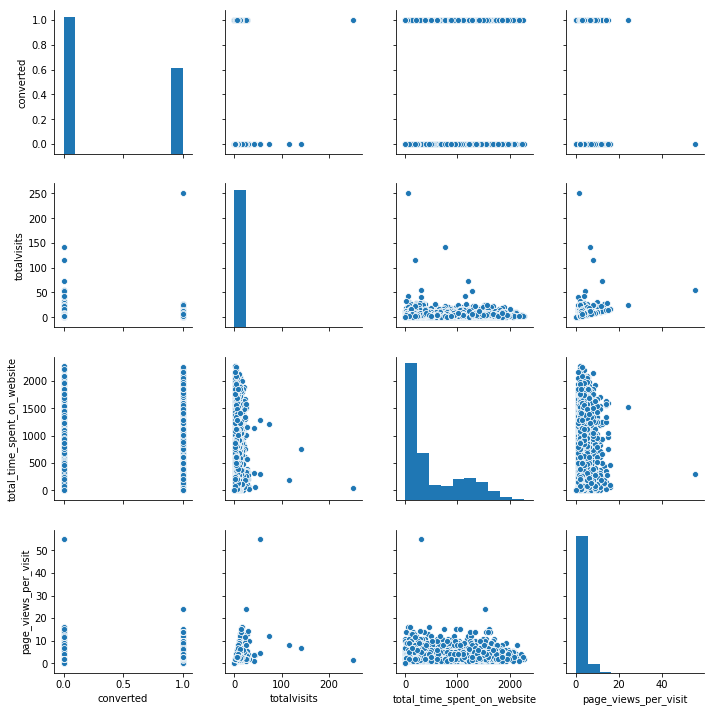

In [88]:
sns.pairplot(df_leads)
plt.show()

C:\Users\Vinay-Dell\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


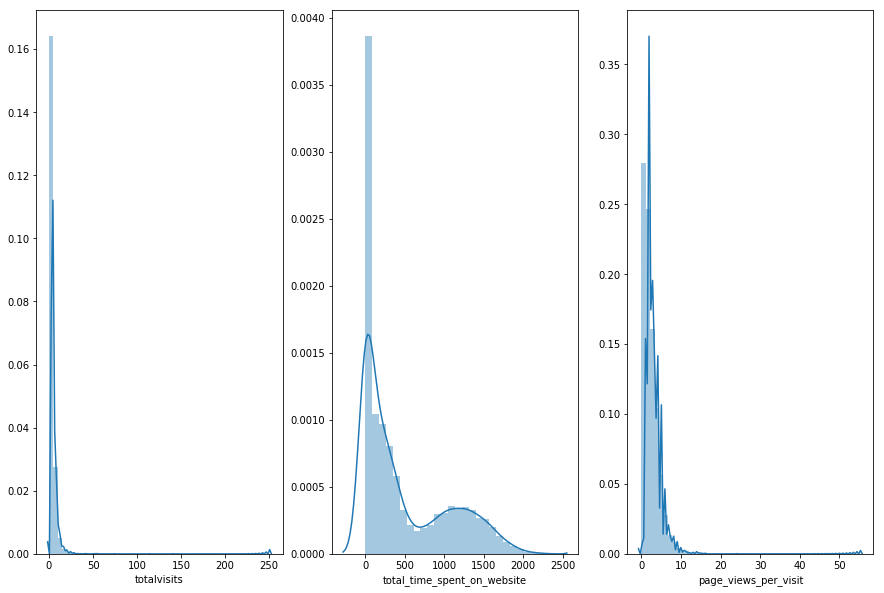

In [89]:
plt.figure(figsize=(15, 10))

cnt = 1
for var in num_vars:
    plt.subplot(1, 3, cnt)
    if var != 'converted':
        sns.distplot(df_leads[var])
        cnt=cnt+1
    
plt.show()

C:\Users\Vinay-Dell\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


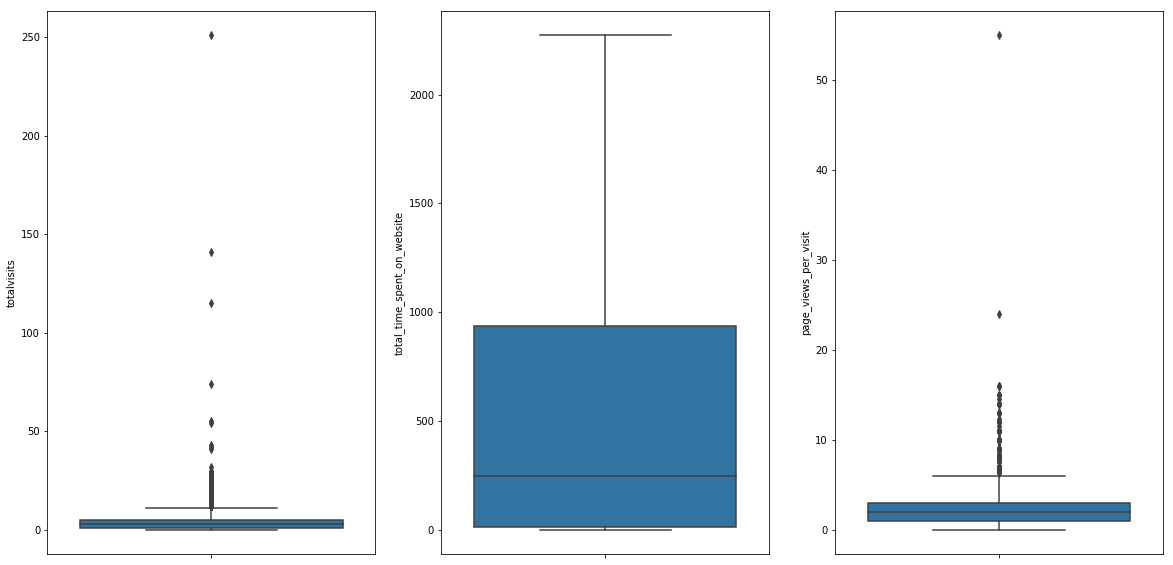

In [90]:
plt.figure(figsize=(20, 10))

cnt = 1
for var in num_vars:
    plt.subplot(1, 3, cnt)
    if var != 'converted':
        sns.boxplot(y=df_leads[var])
        cnt=cnt+1
    
plt.show()

In [91]:
df_leads.totalvisits.sort_values(ascending=False).head(15)

6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
5538     54.0
1160     43.0
8230     42.0
5530     41.0
6580     32.0
1824     30.0
8001     29.0
2861     29.0
4471     28.0
7153     28.0
Name: totalvisits, dtype: float64

In [92]:
df_leads[df_leads.totalvisits > 30]['totalvisits'].sort_values()

6580     32.0
5530     41.0
8230     42.0
1160     43.0
5538     54.0
2190     55.0
5283     74.0
5608    115.0
2322    141.0
6102    251.0
Name: totalvisits, dtype: float64

In [93]:
df_leads.page_views_per_visit.sort_values(ascending=False).head(15)

2190    55.0
6805    24.0
5495    16.0
5164    16.0
125     16.0
387     15.0
5915    15.0
8640    15.0
4518    15.0
8001    14.5
6300    14.0
1697    14.0
5531    14.0
246     14.0
7685    14.0
Name: page_views_per_visit, dtype: float64

In [94]:
df_leads[df_leads.page_views_per_visit > 16]['page_views_per_visit']

2190    55.0
6805    24.0
Name: page_views_per_visit, dtype: float64

### Cap the Outlier to a limit :
* page_views_per_visit --> cap to 16, meaning if the value is 16 it would mean that the page views per visit are 16 or more
* totalvisits --> cap to 30, meaning if the value is 30 it would mean that the total visits are 30 or more

In [95]:
a = np.array(df_leads['page_views_per_visit'].values.tolist())
df_leads['page_views_per_visit'] = np.where(a > 16, 16, a).tolist()

In [96]:
a = np.array(df_leads['totalvisits'].values.tolist())
df_leads['totalvisits'] = np.where(a > 30, 30, a).tolist()

** Plot of converted and non-converted leads against each of the categorical variables. **

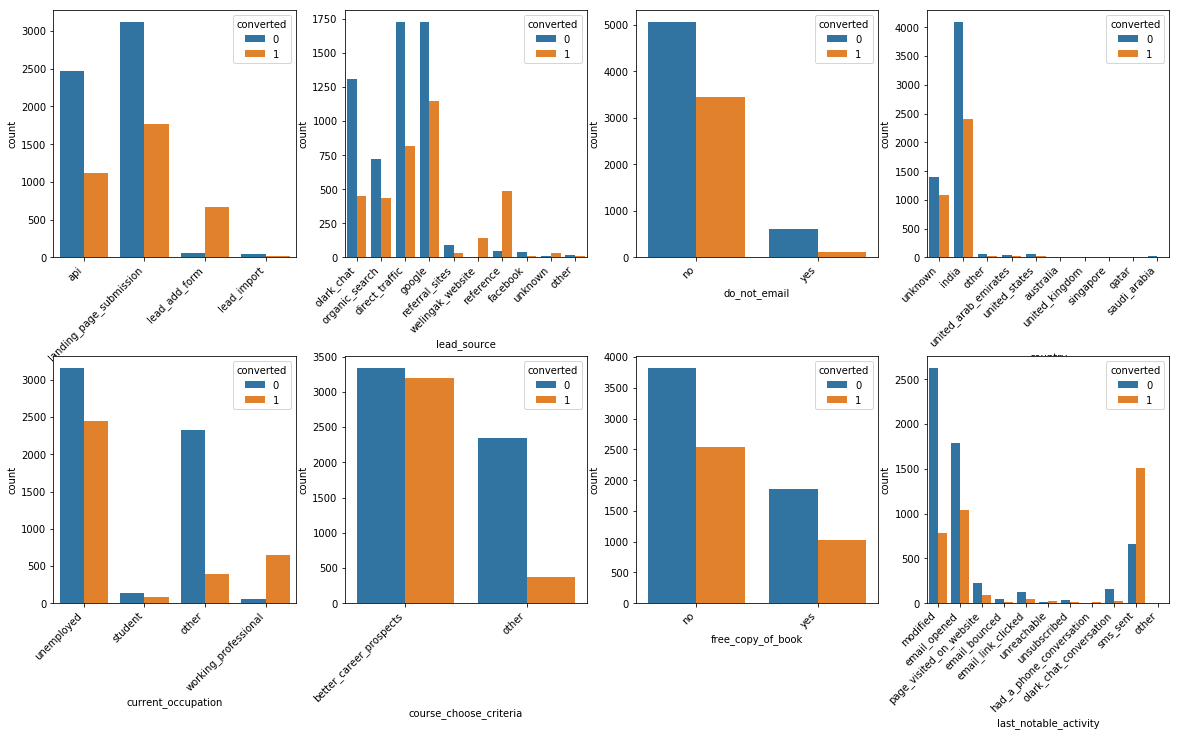

In [97]:
fig = plt.figure(figsize=(20, 30), )

cnt = 1
for var in cat_vars:
    plt.subplot(5, 4, cnt)
    ax=sns.countplot(x=df_leads[var], hue=df_leads["converted"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    cnt=cnt+1

plt.subplots_adjust(hspace = 0.4)
plt.show()

### Variable Encoding : Binary and Dummy Encoding

In [98]:
# Binary encode 'yes' to 1 and 'no' to 0 - columns 'do_not_email' and 'free_copy_of_book'
# Binary encode 'better career prospects' to 1 and 'no' to 0 - 
df_leads['do_not_email'] = df_leads['do_not_email'].map({'yes': 1, 'no': 0})
df_leads['free_copy_of_book'] = df_leads['free_copy_of_book'].map({'yes': 1, 'no': 0})
df_leads['course_choose_criteria'] = df_leads['course_choose_criteria'].map({'better_career_prospects': 1, 'other': 0})

In [99]:
# Create a list of categorical variables with more than 2 categories for creation of dummy variables
rem_cat_vars = []
for col in cat_vars:
    _ = df_leads[col].nunique()
    if _ > 2:
        rem_cat_vars.append(col)
        print("{:<40} : {}".format(col,_))

lead_origin                              : 4
lead_source                              : 10
country                                  : 10
current_occupation                       : 4
last_notable_activity                    : 11


In [100]:
for col in cat_vars:
    print("Column : ",col)
    display(custom_value_counts(df_leads[col]).T)    

Column :  lead_origin


,landing_page_submission,api,lead_add_form,lead_import
lead_origin,4886,3580,719,55


Column :  lead_source


,google,direct_traffic,olark_chat,organic_search,reference,welingak_website,referral_sites,facebook,unknown,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


Column :  do_not_email


,0,1
do_not_email,8506,734


Column :  country


,india,unknown,other,united_states,united_arab_emirates,singapore,saudi_arabia,united_kingdom,australia,qatar
country,6492,2466,77,69,53,24,21,15,13,10


Column :  current_occupation


,unemployed,other,working_professional,student
current_occupation,5600,2724,706,210


Column :  course_choose_criteria


,1,0
course_choose_criteria,6528,2712


Column :  free_copy_of_book


,0,1
free_copy_of_book,6352,2888


Column :  last_notable_activity


,modified,email_opened,sms_sent,page_visited_on_website,olark_chat_conversation,email_link_clicked,email_bounced,unsubscribed,unreachable,had_a_phone_conversation,other
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,7


In [101]:
df_leads.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,country,current_occupation,course_choose_criteria,free_copy_of_book,last_notable_activity
0,api,olark_chat,0,0,0.0,0,0.0,unknown,unemployed,1,0,modified
1,api,organic_search,0,0,5.0,674,2.5,india,unemployed,1,0,email_opened
2,landing_page_submission,direct_traffic,0,1,2.0,1532,2.0,india,student,1,1,email_opened
3,landing_page_submission,direct_traffic,0,0,1.0,305,1.0,india,unemployed,1,0,modified
4,landing_page_submission,google,0,1,2.0,1428,1.0,india,unemployed,1,0,modified


In [102]:
# Create dummies for remaining variables
# Create the master daatframe which contains numerical variables and categorical variables(binary and dummy encoded)

master_leads_df = pd.get_dummies(df_leads,columns=rem_cat_vars,drop_first=True)

In [103]:
master_leads_df.shape

(9240, 41)

In [104]:
master_leads_df.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_other,lead_source_reference,lead_source_referral_sites,lead_source_unknown,lead_source_welingak_website,country_india,country_other,country_qatar,country_saudi_arabia,country_singapore,country_united_arab_emirates,country_united_kingdom,country_united_states,country_unknown,current_occupation_student,current_occupation_unemployed,current_occupation_working_professional,last_notable_activity_email_link_clicked,last_notable_activity_email_opened,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_other,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
0,0,0,0.0,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


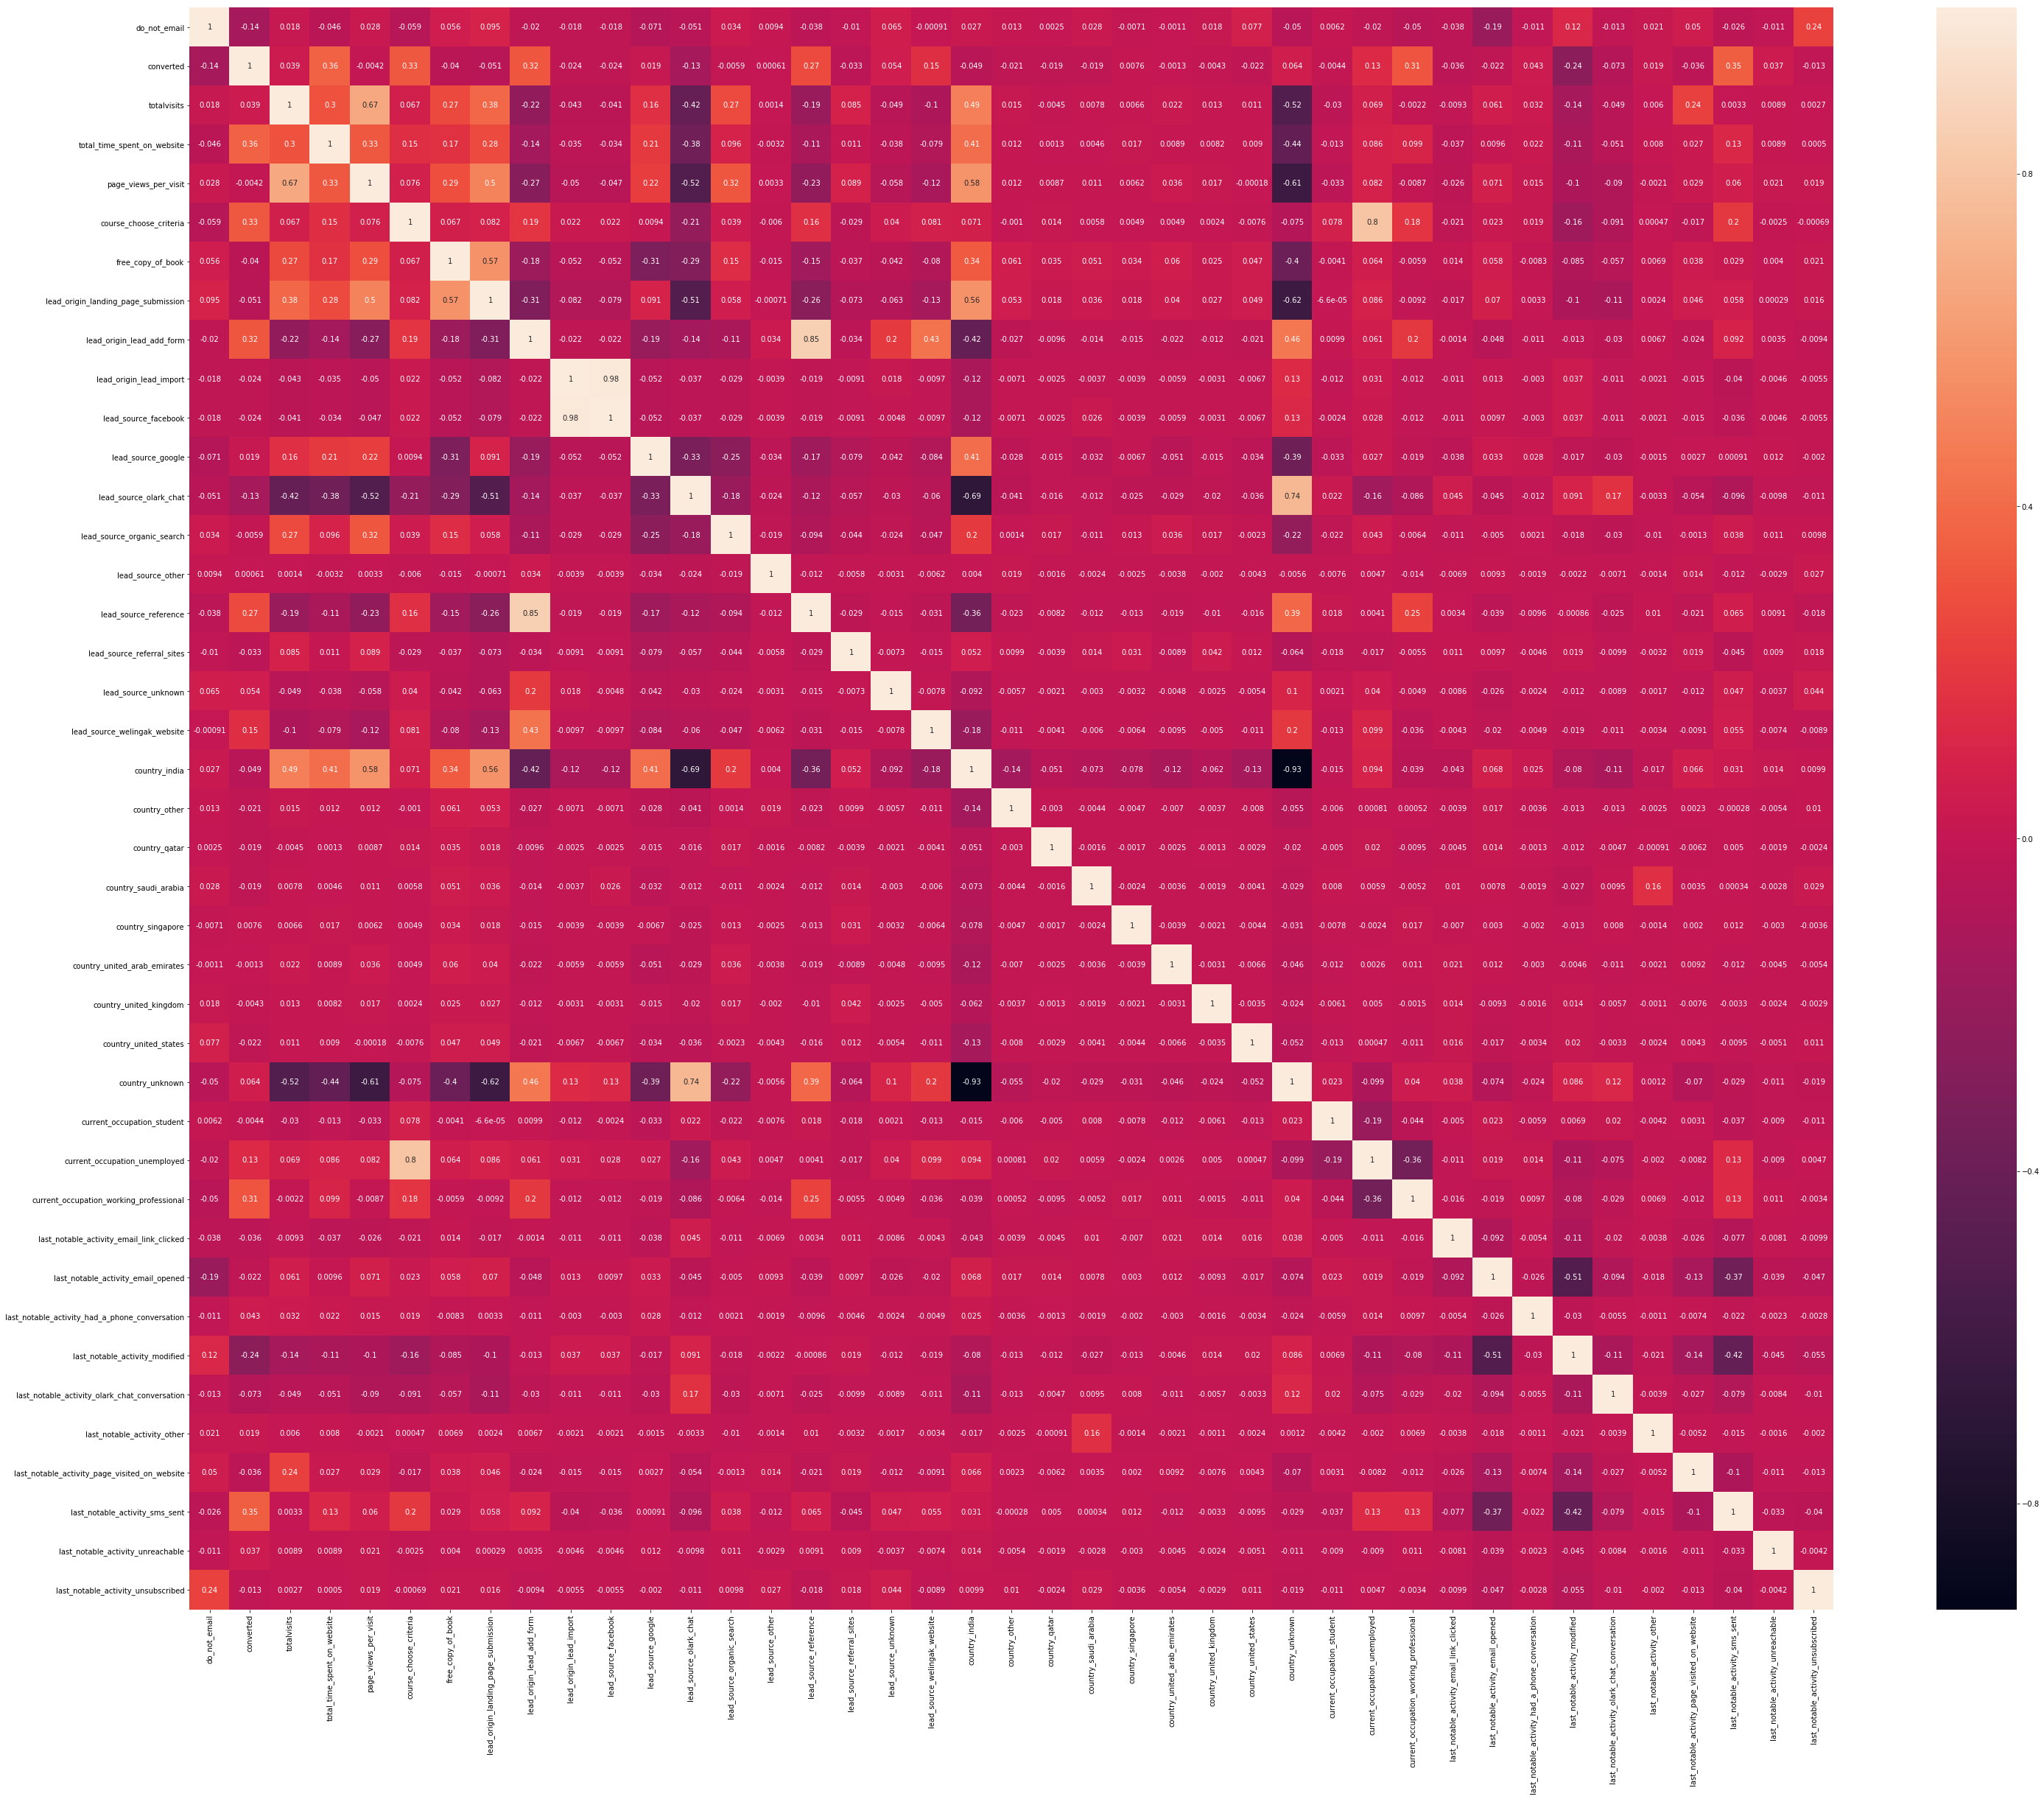

In [105]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))        # Size of the figure
sns.heatmap(master_leads_df.corr(),annot = True)
plt.show()

Some of the variables have very high correlation. Find the variables with correlation greater than 0.7 and check if they can be removed.

In [106]:
c_index = []
c_columns = []
c_value = []
for row in master_leads_df.columns:
    for col in master_leads_df.columns:
        if row != col:
            _ = master_leads_df[row].corr(master_leads_df[col])
            if _ > 0.7:
                #print(row+":"+col+":"+str(_))
                if row < col:
                    c_index.append(row)
                    c_columns.append(col)
                    c_value.append(_)
                    #print([row,col,_],"\n")
                else:
                    c_index.append(col)
                    c_columns.append(row)
                    c_value.append(_)
                    #print([col,row,_],"\n")

In [107]:
corr_matrix = pd.DataFrame([c_index,c_columns,c_value]).T.rename(columns={0:'Var 1',1:'Var 2',2:'coeff'})
corr_matrix = corr_matrix[corr_matrix.duplicated(subset=['Var 1'])]

In [108]:
corr_matrix

,Var 1,Var 2,coeff
3,lead_origin_lead_import,lead_source_facebook,0.981709
5,lead_origin_lead_add_form,lead_source_reference,0.852594
6,country_unknown,lead_source_olark_chat,0.741415
7,course_choose_criteria,current_occupation_unemployed,0.798003


** 4 out the variables have very high correlation. Lets drop these. **

In [109]:
master_leads_df.drop(columns=corr_matrix['Var 2'],inplace=True)

In [110]:
master_leads_df.shape

(9240, 37)

## Model building

In [111]:
from sklearn.model_selection import train_test_split

# Putting feature variables to X
X = master_leads_df.drop(['converted'],axis=1)
X.head()

,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_google,lead_source_organic_search,lead_source_other,lead_source_referral_sites,lead_source_unknown,lead_source_welingak_website,country_india,country_other,country_qatar,country_saudi_arabia,country_singapore,country_united_arab_emirates,country_united_kingdom,country_united_states,country_unknown,current_occupation_student,current_occupation_working_professional,last_notable_activity_email_link_clicked,last_notable_activity_email_opened,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_other,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [112]:
# Putting response variable 'converted' to y
y = master_leads_df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [113]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [114]:
#Feature Scaling

In [115]:
print(num_vars)

['converted', 'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit']


In [116]:
num_vars.remove('converted')

In [117]:
print(num_vars)

['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit']


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_google,lead_source_organic_search,lead_source_other,lead_source_referral_sites,lead_source_unknown,lead_source_welingak_website,country_india,country_other,country_qatar,country_saudi_arabia,country_singapore,country_united_arab_emirates,country_united_kingdom,country_united_states,country_unknown,current_occupation_student,current_occupation_working_professional,last_notable_activity_email_link_clicked,last_notable_activity_email_opened,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_other,last_notable_activity_page_visited_on_website,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
1871,0,-0.951417,-0.885371,-1.137425,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.171687,0.005716,-0.491070,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3516,0,0.452463,-0.691418,0.077528,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8105,0,0.452463,1.365219,1.292480,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-0.951417,-0.885371,-1.137425,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [119]:
# Current Lead Conversion Rate
(sum(y)/len(y))*100

38.53896103896104

#### Running First Training Model

In [120]:
import statsmodels.api as sm

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()
#logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Sun, 03 Mar 2019   Deviance:                       5229.3
Time:                        17:31:37   Pearson chi2:                 7.09e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.7637      1.085     -2.548      0.011      -4.890      -0.638
do_not_email                                      -1.2869      0.197     -6.541      0.000      -1.672      -0.901
totalvisits                                        0.2733      0.047      5.812      0.000       0.181       0.365
total_time_spent_on_website                        1.1072      0.041     27.077      0.000       1.027       1.187
page_views_per_visit                              -0.1789      0.053     -3.346      0.001      -0.284      -0.074
course_choose_criteria                             1.0586      0.088     12.073      0.000       0.887       1.230
free_copy_of_book                                 -0.0324      0.108     -0.301      0.763      -0.243       0.178
lead_origin_landing_page_submission               -0.2741      0.103     -2.665      0.008      -0.476      -0.072
lead_origin_lead_add_form                          2.5163      0.206     12.197      0.000       2.112       2.921
lead_origin_lead_import                           -0.9851      0.519     -1.897      0.058      -2.003       0.033
lead_source_google                                 0.2324      0.110      2.110      0.035       0.017       0.448
lead_source_organic_search                        -0.0087      0.128     -0.068      0.946      -0.259       0.241
lead_source_other                                  0.5686      0.674      0.843      0.399      -0.753       1.890
lead_source_referral_sites                        -0.1124      0.324     -0.347      0.729      -0.747       0.523
lead_source_unknown                               -0.5678      0.576     -0.986      0.324      -1.697       0.561
lead_source_welingak_website                       1.9525      0.748      2.612      0.009       0.487       3.418
country_india                                      0.8655      0.957      0.904      0.366      -1.010       2.741
country_other                                      0.5892      1.031      0.572      0.568      -1.431       2.609
country_qatar                                    -21.4823   1.43e+04     -0.002      0.999    -2.8e+04     2.8e+04
country_saudi_arabia                              -0.2800      1.252     -0.224      0.823      -2.734       2.174
country_singapore                                  0.5359      1.188      0.451      0.652      -1.793       2.865
country_united_arab_emirates                       1.4716      1.041      1.413      0.158      -0.569       3.512
country_united_kingdom                             0.6624      1.513      0.438      0.662      -2.303       3.628
country_united_states                              1.2764      1.048      1.217      0.223      -0.778       3.331
country_unknown                                    1.9588

In [122]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.310254
6795    0.264878
3516    0.397042
8105    0.855089
3934    0.185894
4844    0.992138
3297    0.141580
8071    0.987215
987     0.109072
7423    0.946576
dtype: float64

In [123]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31025434, 0.2648784 , 0.39704169, 0.85508902, 0.18589388,
       0.9921379 , 0.14157976, 0.98721541, 0.10907193, 0.94657648])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [124]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred , 
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.310254,31.025434,1871
1,0,0.264878,26.487840,6795
2,0,0.397042,39.704169,3516
3,0,0.855089,85.508902,8105
4,0,0.185894,18.589388,3934


##### Creating new column 'predicted' with 1 if Convestion_Prob > 0.5 else 0

In [125]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.310254,31.025434,1871,0
1,0,0.264878,26.487840,6795,0
2,0,0.397042,39.704169,3516,0
3,0,0.855089,85.508902,8105,1
4,0,0.185894,18.589388,3934,0


In [126]:
from sklearn import metrics

In [127]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3564  438]
 [ 722 1744]]


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8206555349412492


In [129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,country_india,108.46
29,last_notable_activity_modified,52.86
27,last_notable_activity_email_opened,45.09
23,country_unknown,41.41
33,last_notable_activity_sms_sent,34.98
32,last_notable_activity_page_visited_on_website,6.16
6,lead_origin_landing_page_submission,4.84
4,course_choose_criteria,3.98
30,last_notable_activity_olark_chat_conversation,3.69
26,last_notable_activity_email_link_clicked,3.67


The best accuracy that can be got using all the variables is 82%.    
As can be seen from the summary and VIF stats, there are a lot of variables with very high p-value and VIF which can be eliminated.    
Let us reduce the number of features and try to maintain the accuracy level to ~80%.

### Feature Selection Using RFE

In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [132]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [133]:
rfe.support_

array([ True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False])

In [134]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', False, 18),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 19),
 ('course_choose_criteria', True, 1),
 ('free_copy_of_book', False, 23),
 ('lead_origin_landing_page_submission', False, 10),
 ('lead_origin_lead_add_form', True, 1),
 ('lead_origin_lead_import', False, 2),
 ('lead_source_google', False, 16),
 ('lead_source_organic_search', False, 24),
 ('lead_source_other', False, 13),
 ('lead_source_referral_sites', False, 21),
 ('lead_source_unknown', False, 11),
 ('lead_source_welingak_website', True, 1),
 ('country_india', False, 25),
 ('country_other', False, 17),
 ('country_qatar', True, 1),
 ('country_saudi_arabia', False, 3),
 ('country_singapore', False, 15),
 ('country_united_arab_emirates', False, 9),
 ('country_united_kingdom', False, 22),
 ('country_united_states', False, 14),
 ('country_unknown', True, 1),
 ('current_occupation_student', False, 20),
 ('current_occupation_working_professional', True, 1)

In [135]:
col = X_train.columns[rfe.support_]

In [136]:
list(col)

['do_not_email',
 'total_time_spent_on_website',
 'course_choose_criteria',
 'lead_origin_lead_add_form',
 'lead_source_welingak_website',
 'country_qatar',
 'country_unknown',
 'current_occupation_working_professional',
 'last_notable_activity_had_a_phone_conversation',
 'last_notable_activity_other',
 'last_notable_activity_sms_sent',
 'last_notable_activity_unreachable']

In [137]:
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views_per_visit', 'free_copy_of_book', 'lead_origin_landing_page_submission', 'lead_origin_lead_import', 'lead_source_google', 'lead_source_organic_search', 'lead_source_other', 'lead_source_referral_sites', 'lead_source_unknown', 'country_india', 'country_other', 'country_saudi_arabia', 'country_singapore', 'country_united_arab_emirates', 'country_united_kingdom', 'country_united_states', 'current_occupation_student', 'last_notable_activity_email_link_clicked', 'last_notable_activity_email_opened', 'last_notable_activity_modified', 'last_notable_activity_olark_chat_conversation', 'last_notable_activity_page_visited_on_website', 'last_notable_activity_unsubscribed'], dtype='object')

##### Assessing the model with StatsModels

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.4
Date:                Sun, 03 Mar 2019   Deviance:                       5370.7
Time:                        17:31:41   Pearson chi2:                 6.96e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.3309      0.085    -27.268      0.000      -2.498      -2.163
do_not_email                                      -1.3381      0.166     -8.042      0.000      -1.664      -1.012
total_time_spent_on_website                        1.0967      0.040     27.396      0.000       1.018       1.175
course_choose_criteria                             1.1008      0.086     12.797      0.000       0.932       1.269
lead_origin_lead_add_form                          2.5246      0.194     13.008      0.000       2.144       2.905
lead_source_welingak_website                       1.9831      0.743      2.668      0.008       0.526       3.440
country_qatar                                    -22.4168   1.43e+04     -0.002      0.999   -2.81e+04     2.8e+04
country_unknown                                    1.0110      0.100     10.104      0.000       0.815       1.207
current_occupation_working_professional            2.5122      0.186     13.527      0.000       2.148       2.876
last_notable_activity_had_a_phone_conversation     3.6784      1.110      3.313      0.001       1.502       5.855
last_notable_activity_other                        2.6462      1.342      1.971      0.049       0.015       5.277
last_notable_activity_sms_sent                     1.5356      0.078     19.680      0.000       1.383       1.689
last_notable_activity_unreachable                  2.0969      0.535      3.918      0.000       1.048       3.146
==================================================================================================================
"""

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,country_unknown,1.80
2,course_choose_criteria,1.70
3,lead_origin_lead_add_form,1.70
10,last_notable_activity_sms_sent,1.38
1,total_time_spent_on_website,1.28
4,lead_source_welingak_website,1.24
7,current_occupation_working_professional,1.20
0,do_not_email,1.05
5,country_qatar,1.00
8,last_notable_activity_had_a_phone_conversation,1.00


In [140]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.233249
6795    0.227260
3516    0.273418
8105    0.858483
3934    0.233249
4844    0.992315
3297    0.116035
8071    0.989345
987     0.158896
7423    0.922082
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23324876, 0.22726035, 0.27341803, 0.8584832 , 0.23324876,
       0.99231459, 0.11603465, 0.98934492, 0.15889558, 0.92208157])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                   'Conversion_Prob':y_train_pred,
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.233249,23.324876,1871
1,0,0.227260,22.726035,6795
2,0,0.273418,27.341803,3516
3,0,0.858483,85.848320,8105
4,0,0.233249,23.324876,3934


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [143]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.233249,23.324876,1871,0
1,0,0.227260,22.726035,6795,0
2,0,0.273418,27.341803,3516,0
3,0,0.858483,85.848320,8105,1
4,0,0.233249,23.324876,3934,0


In [144]:
from sklearn import metrics

In [145]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3552  450]
 [ 749 1717]]


In [146]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814625850340136


With just 12 variables we are able to get an accuracy of ~81.5% .

In [147]:
# Very high p-value on country_qatar, so we drop and rebuild the model again
col = col.drop('country_qatar', 1)
col

Index(['do_not_email', 'total_time_spent_on_website', 'course_choose_criteria', 'lead_origin_lead_add_form', 'lead_source_welingak_website', 'country_unknown', 'current_occupation_working_professional', 'last_notable_activity_had_a_phone_conversation', 'last_notable_activity_other', 'last_notable_activity_sms_sent', 'last_notable_activity_unreachable'], dtype='object')

In [148]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2689.8
Date:                Sun, 03 Mar 2019   Deviance:                       5379.5
Time:                        17:31:42   Pearson chi2:                 6.96e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.3311      0.085    -27.285      0.000      -2.499      -2.164
do_not_email                                      -1.3345      0.166     -8.022      0.000      -1.661      -1.008
total_time_spent_on_website                        1.0948      0.040     27.396      0.000       1.016       1.173
course_choose_criteria                             1.0972      0.086     12.763      0.000       0.929       1.266
lead_origin_lead_add_form                          2.5255      0.194     13.014      0.000       2.145       2.906
lead_source_welingak_website                       1.9829      0.743      2.668      0.008       0.526       3.439
country_unknown                                    1.0123      0.100     10.122      0.000       0.816       1.208
current_occupation_working_professional            2.5158      0.186     13.549      0.000       2.152       2.880
last_notable_activity_had_a_phone_conversation     3.6803      1.110      3.315      0.001       1.504       5.856
last_notable_activity_other                        2.6452      1.342      1.971      0.049       0.015       5.276
last_notable_activity_sms_sent                     1.5336      0.078     19.680      0.000       1.381       1.686
last_notable_activity_unreachable                  2.0982      0.535      3.922      0.000       1.050       3.147
==================================================================================================================
"""

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,country_unknown,1.80
2,course_choose_criteria,1.70
3,lead_origin_lead_add_form,1.70
9,last_notable_activity_sms_sent,1.38
1,total_time_spent_on_website,1.28
4,lead_source_welingak_website,1.24
6,current_occupation_working_professional,1.20
0,do_not_email,1.05
7,last_notable_activity_had_a_phone_conversation,1.00
8,last_notable_activity_other,1.00


In [150]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [151]:
y_train_pred[:10]

array([0.23311035, 0.2266105 , 0.27319169, 0.85747498, 0.23311035,
       0.99227177, 0.11579712, 0.98937202, 0.1587258 , 0.92140188])

In [152]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred,
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.233110,23.311035,1871
1,0,0.226610,22.661050,6795
2,0,0.273192,27.319169,3516
3,0,0.857475,85.747498,8105
4,0,0.233110,23.311035,3934


In [153]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.233110,23.311035,1871,0
1,0,0.226610,22.661050,6795,0
2,0,0.273192,27.319169,3516,0
3,0,0.857475,85.747498,8105,1
4,0,0.233110,23.311035,3934,0


In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3553  449]
 [ 751 1715]]


In [155]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8144712430426716


In [156]:
# Very high p-value on last_notable_activity_other, so we drop and rebuild the model again
col = col.drop('last_notable_activity_other', 1)
col

Index(['do_not_email', 'total_time_spent_on_website', 'course_choose_criteria', 'lead_origin_lead_add_form', 'lead_source_welingak_website', 'country_unknown', 'current_occupation_working_professional', 'last_notable_activity_had_a_phone_conversation', 'last_notable_activity_sms_sent', 'last_notable_activity_unreachable'], dtype='object')

In [157]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.7
Date:                Sun, 03 Mar 2019   Deviance:                       5383.4
Time:                        17:31:43   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.3265      0.085    -27.269      0.000      -2.494      -2.159
do_not_email                                      -1.3250      0.166     -8.005      0.000      -1.649      -1.001
total_time_spent_on_website                        1.0952      0.040     27.423      0.000       1.017       1.173
course_choose_criteria                             1.0932      0.086     12.732      0.000       0.925       1.262
lead_origin_lead_add_form                          2.5231      0.194     13.005      0.000       2.143       2.903
lead_source_welingak_website                       1.9824      0.743      2.668      0.008       0.526       3.439
country_unknown                                    1.0137      0.100     10.140      0.000       0.818       1.210
current_occupation_working_professional            2.5190      0.186     13.575      0.000       2.155       2.883
last_notable_activity_had_a_phone_conversation     3.6789      1.110      3.314      0.001       1.503       5.854
last_notable_activity_sms_sent                     1.5316      0.078     19.660      0.000       1.379       1.684
last_notable_activity_unreachable                  2.0957      0.535      3.919      0.000       1.048       3.144
==================================================================================================================
"""

In [158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,country_unknown,1.80
2,course_choose_criteria,1.70
3,lead_origin_lead_add_form,1.70
8,last_notable_activity_sms_sent,1.38
1,total_time_spent_on_website,1.28
4,lead_source_welingak_website,1.24
6,current_occupation_working_professional,1.20
0,do_not_email,1.05
7,last_notable_activity_had_a_phone_conversation,1.00
9,last_notable_activity_unreachable,1.00


In [159]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [160]:
y_train_pred[:10]

array([0.2334012 , 0.22671304, 0.27352964, 0.85736096, 0.2334012 ,
       0.99229069, 0.11582787, 0.98940005, 0.15937191, 0.92135141])

In [161]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred,
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.233401,23.340120,1871
1,0,0.226713,22.671304,6795
2,0,0.273530,27.352964,3516
3,0,0.857361,85.736096,8105
4,0,0.233401,23.340120,3934


In [162]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.233401,23.340120,1871,0
1,0,0.226713,22.671304,6795,0
2,0,0.273530,27.352964,3516,0
3,0,0.857361,85.736096,8105,1
4,0,0.233401,23.340120,3934,0


In [163]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3551  451]
 [ 750 1716]]


In [164]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8143166357452072


In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,country_unknown,1.80
2,course_choose_criteria,1.70
3,lead_origin_lead_add_form,1.70
8,last_notable_activity_sms_sent,1.38
1,total_time_spent_on_website,1.28
4,lead_source_welingak_website,1.24
6,current_occupation_working_professional,1.20
0,do_not_email,1.05
7,last_notable_activity_had_a_phone_conversation,1.00
9,last_notable_activity_unreachable,1.00


There are no variables with p-value > 0.5 and VIF > 5. We will stop the process of manually removing the features at this juncture.

In [166]:
# Final list of variables 
list(col)

['do_not_email',
 'total_time_spent_on_website',
 'course_choose_criteria',
 'lead_origin_lead_add_form',
 'lead_source_welingak_website',
 'country_unknown',
 'current_occupation_working_professional',
 'last_notable_activity_had_a_phone_conversation',
 'last_notable_activity_sms_sent',
 'last_notable_activity_unreachable']

With just 10 variables we are able to get an accuracy of 81.43 % . 

#### Original attributes associated with the final set of variables are
    * Do Not Email
    * Total Time Spent on Website
    * Criteria for choosing the course
    * Lead Origin
    * Lead Source
    * Country
    * Current Occupation
    * Last Notable Activity

In [167]:
round(res.params.sort_values(ascending=False),4)

last_notable_activity_had_a_phone_conversation    3.6789
lead_origin_lead_add_form                         2.5231
current_occupation_working_professional           2.5190
last_notable_activity_unreachable                 2.0957
lead_source_welingak_website                      1.9824
last_notable_activity_sms_sent                    1.5316
total_time_spent_on_website                       1.0952
course_choose_criteria                            1.0932
country_unknown                                   1.0137
do_not_email                                     -1.3250
const                                            -2.3265
dtype: float64

Top 3 Original Variables:
    * Last Notable Activity
    * Lead Origin
    * Current Occupation
    
Top 3 categorical/dummy variable to increase probability of lead conversion:
    * last_notable_activity_had_a_phone_conversation
    * lead_origin_lead_add_form
    * current_occupation_working_professional

## Metrics 

In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6958637469586375

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873063468265867

In [171]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.11269365317341329


In [172]:
# positive predictive value 
print (TP / float(TP+FP))

0.7918781725888325


In [173]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8256219483840967


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [174]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [175]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

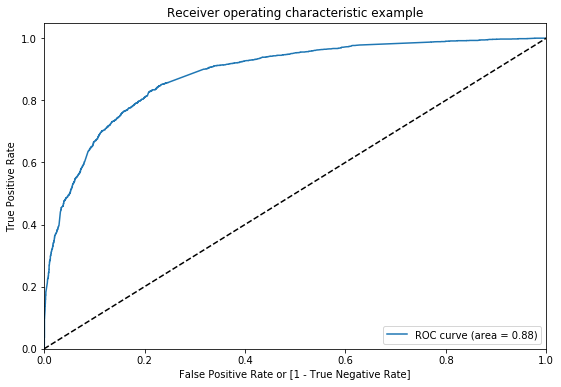

In [176]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [177]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.233401,23.340120,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.226713,22.671304,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.273530,27.352964,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.857361,85.736096,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.233401,23.340120,3934,0,1,1,1,0,0,0,0,0,0,0


In [178]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.605288  0.977291  0.376062
0.2   0.2  0.751701  0.912409  0.652674
0.3   0.3  0.803030  0.833333  0.784358
0.4   0.4  0.810761  0.766423  0.838081
0.5   0.5  0.814317  0.695864  0.887306
0.6   0.6  0.795918  0.591241  0.922039
0.7   0.7  0.781540  0.515410  0.945527
0.8   0.8  0.750464  0.391727  0.971514
0.9   0.9  0.719697  0.283049  0.988756


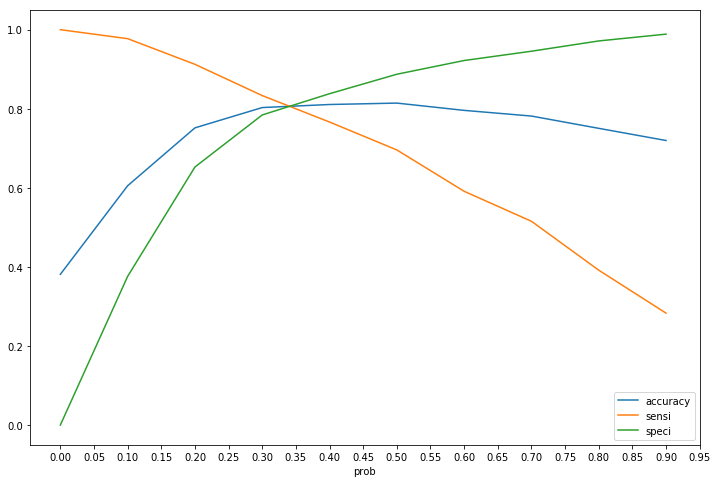

In [179]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(12,8))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

** From the accuracy-sensitivity-specificity plot above, the accuracy is at peak and remains constant between 0.2 and 0.53. **

** All the three metrics converge at 0.35. **

### Precision and recall tradeoff

In [180]:
from sklearn.metrics import precision_recall_curve

In [181]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

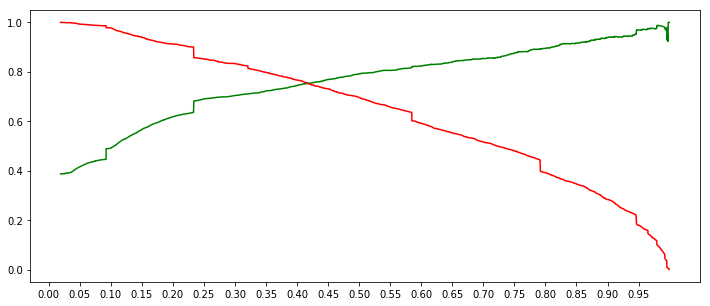

In [182]:
plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

** From the Precision-Recall Tradeoff, the cutoff is around 0.425 (between 0.4 and 0.45) . **

** Considering both the aspects, we can chooose the cut-off as 0.47 and use the Precision-Recall-Accuracy metrics to evaluate the model **

In [183]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.47 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.233401,23.340120,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.226713,22.671304,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.273530,27.352964,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.857361,85.736096,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.233401,23.340120,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [184]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8133889919604206

In [185]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3500,  502],
       [ 705, 1761]], dtype=int64)

In [186]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [187]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7141119221411192

In [188]:
# Let us calculate specificity
TN / float(TN+FP)

0.8745627186406797

In [189]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.12543728135932034


In [190]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7781705700397702


In [191]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8323424494649228


## Accuracy , Precision and Recall

In [192]:
# Accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8133889919604206

In [193]:
# Precision 
TP / (TP + FP)

0.7781705700397702

In [194]:
# Recall 
TP / (TP + FN)

0.7141119221411192

### Making predictions on the test set

In [195]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [196]:
X_test = X_test[col]
X_test.head()

,do_not_email,total_time_spent_on_website,course_choose_criteria,lead_origin_lead_add_form,lead_source_welingak_website,country_unknown,current_occupation_working_professional,last_notable_activity_had_a_phone_conversation,last_notable_activity_sms_sent,last_notable_activity_unreachable
4269,0,0.964504,0,0,0,0,0,0,1,0
2376,0,-0.885371,1,1,0,1,0,0,1,0
7766,0,-0.777416,1,0,0,0,1,0,0,1
9199,0,-0.885371,1,0,0,1,0,0,0,0
4359,0,-0.885371,1,1,0,1,0,0,0,0


In [197]:
X_test_sm = sm.add_constant(X_test)

In [198]:
y_test_pred = res.predict(X_test_sm)

In [199]:
y_test_pred[:10]

4269    0.564992
2376    0.946115
7766    0.926221
9199    0.233401
4359    0.791490
9186    0.635320
1631    0.456883
8963    0.158981
8007    0.068705
5324    0.413221
dtype: float64

In [200]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [201]:
# Let's see the head
y_pred_1.head()

,0
4269,0.564992
2376,0.946115
7766,0.926221
9199,0.233401
4359,0.791490


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [203]:
# Putting Lead_ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [204]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1 , y_pred_1*100],axis=1)

In [206]:
y_pred_final.head()

,converted,Lead_ID,0,0
0,1,4269,0.564992,56.499180
1,1,2376,0.946115,94.611526
2,1,7766,0.926221,92.622117
3,0,9199,0.233401,23.340120
4,1,4359,0.791490,79.149044


In [207]:
y_pred_final.columns = [ 'Converted' , 'Lead_ID', 'Conversion_Prob' , 'Lead_Score']

In [208]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead_ID,Conversion_Prob,Lead_Score
0,1,4269,0.564992,56.499180
1,1,2376,0.946115,94.611526
2,1,7766,0.926221,92.622117
3,0,9199,0.233401,23.340120
4,1,4359,0.791490,79.149044


In [209]:
#precision - recall
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.47 else 0)

In [210]:
y_pred_final.head()

,Converted,Lead_ID,Conversion_Prob,Lead_Score,final_predicted
0,1,4269,0.564992,56.499180,1
1,1,2376,0.946115,94.611526,1
2,1,7766,0.926221,92.622117,1
3,0,9199,0.233401,23.340120,0
4,1,4359,0.791490,79.149044,1


In [211]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1477,  200],
       [ 326,  769]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Test - Accuracy, Precision and Recall

In [213]:
# Accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8102453102453102

In [214]:
# Precision
TP / float(TP+FP)

0.7936016511867905

In [215]:
# Recall
TP / float(TP+FN)

0.7022831050228311

#### Varying cutoff to get different number of projected leads
    * When there are more people to contact the leads and try to convert then we can lower the cut-off to get more projected leads.
    
    * When the target has been met, we can increase the cut-off to ensure that we get only few projected leads which are having a very high probability of conversion.

In [216]:
prob = []
potential_leads = []
for i in np.arange(0.05,1,0.05):
    prob.append(i)
    potential_leads.append(sum(y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)) + 
                           sum(y_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)))

In [217]:
projected_leads = pd.DataFrame([prob,potential_leads]).T.rename(columns={0:'Probability Cut-Off',1:'Projected Leads'})

In [218]:
projected_leads

,Probability Cut-Off,Projected Leads
0,0.05,8441.0
1,0.10,7025.0
2,0.15,5903.0
3,0.20,5228.0
4,0.25,4365.0
5,0.30,4171.0
6,0.35,3905.0
7,0.40,3640.0
8,0.45,3342.0
9,0.50,3087.0


#### Merge with the original csv to provide Lead_Score and Final_Predicted values for cutoff = 0.47

In [219]:
# Create a list containing the Lead_ID
lead_list = list(y_train_pred_final.Lead_ID)
lead_list.extend(y_pred_final.Lead_ID)

In [220]:
# Create a list containing the Lead Scores
score_list = list(y_train_pred_final.Lead_Score)
score_list.extend(y_pred_final.Lead_Score)

In [221]:
# Create a list containing the Predicted Value
pred_list = list(y_train_pred_final.final_predicted)
pred_list.extend(y_pred_final.final_predicted)

In [222]:
# Create a dataframe using the above 3 lists , change the dtypes and set index
lead_score_predication = pd.DataFrame([lead_list,score_list,pred_list]).T.\
rename(columns={0:'Lead_ID',1 : 'Lead_Score', 2:'Final_Prediction'})

lead_score_predication.Final_Prediction = lead_score_predication.Final_Prediction.astype('int')

lead_score_predication.Lead_ID = lead_score_predication.Lead_ID.astype('int')

lead_score_predication.set_index(lead_score_predication.Lead_ID,drop=False,inplace=True)

lead_score_predication.head()

,Lead_ID,Lead_Score,Final_Prediction
Lead_ID,,,
1871,1871,23.340120,0
6795,6795,22.671304,0
3516,3516,27.352964,0
8105,8105,85.736096,1
3934,3934,23.340120,0


In [223]:
# Import original data to a new dataframe
orig_df = pd.read_csv('Leads.csv',encoding='utf-8')

In [224]:
# Merge lead_score_predication and orig_df
master_df = pd.merge(orig_df, lead_score_predication,left_index=True,right_index=True)

In [225]:
master_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_ID,Lead_Score,Final_Prediction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,23.340120,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1,29.896538,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2,70.415144,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,3,16.914751,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,4,65.897653,1


# END